<br><br><center><h1 style="font-size:3em;color:#2467C0">Mini project 2</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="job.jpg" align="middle" style="width:500px;height:250px;"/></td>
<td>
직장을 옮기는 이직은 빈번히 발생한다. 본 프로젝트에서는 이직과 관련된 요소를 추출하고, 이를 기반으로 이직을 예측할 수 있는 모델을 구축해본다. 본 프로젝트를 통해서 학습 했던 내용(데이터 정제, 모델 구축, 모델 성능 평가 등)을 실습하여 본다.
</td>
</tr>
</table>

<h1 style="font-size:2em;color:#2467C0">1. Import Libraries</h1>

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('data/aug_train.csv')
data.shape

(19158, 14)

In [4]:
data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


데이터를 보면 NaN이 많이 포함되어 있음. 

이는 반드시 제거를 해주어야 머신러닝 모델링을 진행할 수 있다.

전처리 작업이 필요.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
data.isna()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,True,False,False,False
3,False,False,False,True,False,True,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19154,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [7]:
# False = 0 이고 True = 1 이기 때문에,
# sum()을 해주고, 0 보다 큰 값이 나온다는 것은 각 column에 대해 NaN값이 존재함을 의미
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

NaN 값이 많은 것을 확인.

<h1 style="font-size:2em;color:#2467C0">2. Data Cleaning</h1>

In [8]:
data.columns # column 정보를 한번 출력

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

## city

In [9]:
data.city = data.city.apply(lambda x: int(x.split('_')[1]))

In [10]:
# city 숫자 ID만 추출.
data.city 

0        103
1         40
2         21
3        115
4        162
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19158, dtype: int64

## gender

In [11]:
data.gender.isna().sum()

4508

In [12]:
data.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [13]:
# NaN대신에 'Male'로 데이터를 채워줌.
data.gender = data.gender.fillna('Male')

## enrolled_university

In [14]:
data.enrolled_university.isna().sum()

386

In [15]:
data.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [16]:
# NaN대신에 'no_enrollment'로 데이터를 채워줌.
data.enrolled_university = data.enrolled_university.fillna('no_enrollment')

## education_level

In [17]:
data.education_level.isna().sum()

460

In [18]:
data.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [19]:
# NaN대신에 forward fill 기반으로 데이터를 채워줌.
data.education_level = data.education_level.fillna(method='ffill')

## major_discipline

In [21]:
data.major_discipline.isna().sum()

2813

In [22]:
data.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [23]:
# NaN대신에 'STEM'으로 데이터를 채워줌.
data.major_discipline = data.major_discipline.fillna('STEM')

## experience

In [24]:
data.experience.isna().sum()

65

In [25]:
data.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [26]:
# NaN대신에 forward fill 기반으로 데이터를 채워줌.
data.experience = data.experience.fillna(method='ffill')

## company_size

In [27]:
data.company_size.isna().sum()

5938

In [28]:
data.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [29]:
# NaN대신에 forward fill 기반으로 데이터를 채워줌.
data.company_size = data.company_size.fillna(method = 'ffill')
# 가장 처음 샘플의 경우 bfill로 진행할 수 있도록 채워줌.
data.company_size = data.company_size.fillna(method = 'bfill')

## company_type

In [30]:
data.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [31]:
data.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [32]:
# NaN대신에 'Pvt Ltd'으로 데이터를 채워줌.
data.company_type = data.company_type.fillna('Pvt Ltd')

## last_new_job

In [33]:
data.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [34]:
data.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [35]:
# NaN대신에 backward fill 기반으로 데이터를 채워줌.
data.last_new_job = data.last_new_job.fillna(method = 'bfill')

이로써 NaN에 대한 데이터 처리를 완료함.

<h1 style="font-size:2em;color:#2467C0">3. EDA</h1>

In [36]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [37]:
data.describe()

,enrollee_id,city,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,80.128876,0.828848,65.366896,0.249348
std,9616.292592,46.413570,0.123362,60.058462,0.432647
min,1.000000,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,21.000000,0.740000,23.000000,0.000000
50%,16982.500000,101.000000,0.903000,47.000000,0.000000
75%,25169.750000,104.000000,0.920000,88.000000,0.000000
max,33380.000000,180.000000,0.949000,336.000000,1.000000


[]

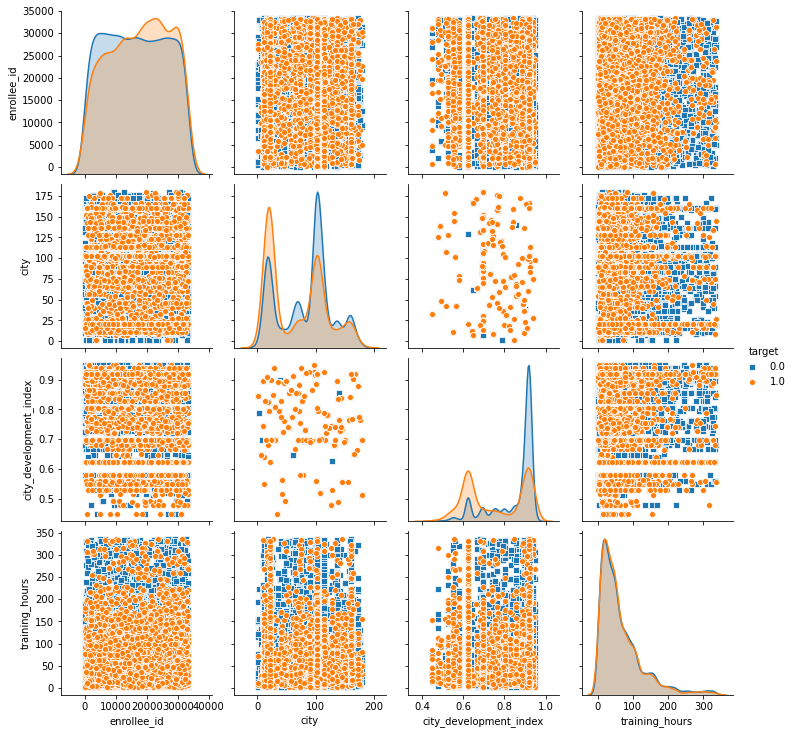

In [38]:
sns.pairplot(data, hue='target', markers = ['s', 'o']) # s는 square(사각형), o는 원
plt.plot()

<Figure size 720x576 with 0 Axes>

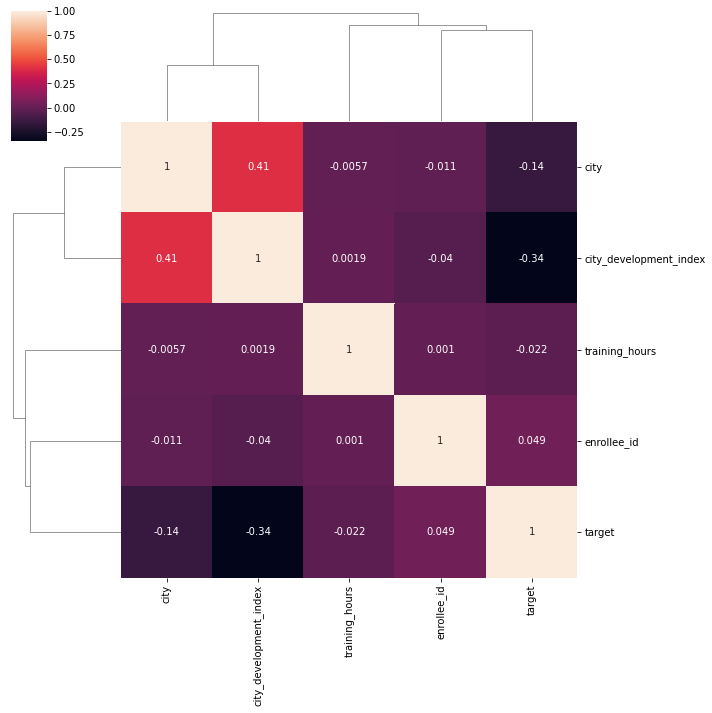

In [40]:
plt.figure(figsize=(10,8))
sns.clustermap(data.corr(),annot = True)
plt.show()

<h1 style="font-size:2em;color:#2467C0">4. Feature Engineering</h1>

In [41]:
# 숫자 값이 들어있는 features
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)
print(numeric_columns)

['enrollee_id', 'city', 'city_development_index', 'training_hours', 'target']


## Encoding

현재 data에는 숫자가 아닌 문자 값으로 구성된 feature들이 많음.

이를 숫자로 바꾸는 작업, 즉 encoding을 진행할 예정.

In [42]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### gender

In [43]:
# LabelEncoder()를 통해서 자동으로 문자형을 숫자형의 레이블로 바꾸어줌
le = LabelEncoder()
data.gender = le.fit_transform(data['gender'])

In [44]:
data.gender

0        1
1        1
2        1
3        1
4        1
        ..
19153    1
19154    1
19155    1
19156    1
19157    1
Name: gender, Length: 19158, dtype: int64

### relevent_experience

In [45]:
# LabelEncoder()를 설정하여, relevant_experience 값을 숫자화 시킴
le = LabelEncoder()
data.relevent_experience = le.fit_transform(data['relevent_experience'])

### enrolled_university

In [46]:
# LabelEncoder()를 설정하여, enrolloed_university 값을 숫자화 시킴
le = LabelEncoder()
data.enrolled_university = le.fit_transform(data['enrolled_university'])

### education_level

In [47]:
# LabelEncoder()를 설정하여, education_level 값을 숫자화 시킴
le = LabelEncoder()
data.education_level = le.fit_transform(data['education_level'])

### major_discipline

In [48]:
# LabelEncoder()를 설정하여, majoir_discipline 값을 숫자화 시킴
le = LabelEncoder()
data.major_discipline = le.fit_transform(data['major_discipline'])

### experience

In [49]:
# LabelEncoder()를 설정하여, experience 값을 숫자화 시킴
le = LabelEncoder()
data.experience = le.fit_transform(data['experience'])

In [50]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,21,50-99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,1,1,2,0,5,6,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,1,1,0,0,5,15,50-99,Pvt Ltd,never,83,0.0
3,33241,115,0.789,1,1,2,0,1,20,50-99,Pvt Ltd,never,52,1.0
4,666,162,0.767,1,0,2,2,5,21,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,1,2,0,2,5,10/49,Pvt Ltd,1,42,1.0
19154,31398,103,0.920,1,0,2,0,5,5,10/49,Pvt Ltd,4,52,1.0
19155,24576,103,0.920,1,0,2,0,5,21,50-99,Pvt Ltd,4,44,0.0
19156,5756,65,0.802,1,0,2,1,5,20,500-999,Pvt Ltd,2,97,0.0


### company_size

In [51]:
data.company_size.value_counts()

50-99        4502
100-500      3765
10000+       2900
10/49        2108
1000-4999    1935
<10          1853
500-999      1280
5000-9999     815
Name: company_size, dtype: int64

In [56]:
# LabelEncoder()를 설정하여, company_size 값을 숫자화 시킴
le = LabelEncoder()
data.company_size = le.fit_transform(data['company_size'])

### company_type

In [57]:
# LabelEncoder()를 설정하여, company_type 값을 숫자화 시킴
le = LabelEncoder()
data.company_type = le.fit_transform(data['company_type'])

### last_new_job

In [59]:
# LabelEncoder()를 설정하여, last_new_job 값을 숫자화 시킴
le = LabelEncoder()
data.last_new_job = le.fit_transform(data['last_new_job'])

In [84]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,21,2,5,1,36,1.0
1,29725,40,0.776,1,1,2,0,5,6,2,5,5,47,0.0
2,11561,21,0.624,1,1,0,0,5,15,2,5,0,83,0.0
3,33241,115,0.789,1,1,2,0,1,20,2,5,0,52,1.0
4,666,162,0.767,1,0,2,2,5,21,2,1,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1,1,2,0,2,5,1,5,1,42,1.0
19154,31398,103,0.920,1,0,2,0,5,5,1,5,4,52,1.0
19155,24576,103,0.920,1,0,2,0,5,21,2,5,4,44,0.0
19156,5756,65,0.802,1,0,2,1,5,20,4,5,2,97,0.0


<h1 style="font-size:2em;color:#2467C0">5. Over Sampling & Train - Test Split</h1>

현재 데이터 셋의 target label은 균등하지 않음 (아래와 같음). 

데이터를 늘리기 위해서 많이 사용하는 SMOTE 기법을 사용함.

In [60]:
data.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [61]:
# SMOTE를 사용하기 위해 필요한 imblearn 라이브러리 설치.
!pip install imblearn

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,21,2,5,1,36,1.0
1,29725,40,0.776,1,1,2,0,5,6,2,5,5,47,0.0
2,11561,21,0.624,1,1,0,0,5,15,2,5,0,83,0.0
3,33241,115,0.789,1,1,2,0,1,20,2,5,0,52,1.0
4,666,162,0.767,1,0,2,2,5,21,2,1,4,8,0.0


In [68]:
y = data.target
X = data.drop('target',axis=1)

In [69]:
y.value_counts()
# 레이블 별 데이터 갯수가 다름

0.0    14381
1.0     4777
Name: target, dtype: int64

In [70]:
# 이를 위해서 데이터 갯수를 맞추어 주는 SMOTE알고리즘 사용 (참고)
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X,y)

In [74]:
# 샘플 갯수 재확인 (많은 것 기준으로 맞추어진 것을 확인)
y.value_counts()

0.0    14381
1.0    14381
Name: target, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### Scale Data

정규화 진행.

In [76]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1 style="font-size:2em;color:#2467C0">6. Build Model</h1>

## Choose Base Model

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [78]:
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

# 각 모델 및 결과에 대한 정리를 위해 배열 추가
results = []
names = []

In [79]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("%s: %.2f" % (name, accuracy))

Naive Bayes: 0.70
KNN: 0.75
CART: 0.74
Random Forest: 0.81
SVM: 0.73


In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
for name, model in models:
    results = cross_val_score(model, X_scaled, y, cv=5)
    print(results)
    print("%s: %.2f" % (name, results.mean()))

[0.64018773 0.68138363 0.72444367 0.71888039 0.73087622]
Naive Bayes: 0.70
[0.65444116 0.704502   0.77121001 0.78442281 0.78598748]
KNN: 0.74
[0.61620024 0.69424648 0.79468011 0.79694019 0.78894298]
CART: 0.74
[0.65635321 0.74535025 0.87482615 0.86891516 0.87343533]
Random Forest: 0.80
[0.66000348 0.70467582 0.75295549 0.75208623 0.76338665]
SVM: 0.73


# Feature importance

각 feature가 모델의 성능에 영향을 주는 정도는 다르다. 

Random Forest 분류기는 각 feature에 대한 영향력을 파악할 수 있도록 feature importance 기능을 제공한다.

In [80]:
# Random Forest
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)
print(y_pred)

[[0.39 0.61]
 [0.91 0.09]
 [0.74 0.26]
 ...
 [0.4  0.6 ]
 [0.96 0.04]
 [0.78 0.22]]


### 각 feature의 영향력은?

In [81]:
print(model.feature_importances_)

[0.14079036 0.10736611 0.19303662 0.01292569 0.01943983 0.07363054
 0.04447348 0.0213609  0.10112321 0.0708581  0.02994479 0.05467017
 0.13038019]


In [86]:
importances = model.feature_importances_
features = data.columns[:13]
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp = imp.sort_values(by = 'Importance')
imp

,Features,Importance
3,gender,0.012926
4,relevent_experience,0.019440
7,major_discipline,0.021361
10,company_type,0.029945
6,education_level,0.044473
11,last_new_job,0.054670
9,company_size,0.070858
5,enrolled_university,0.073631
8,experience,0.101123
1,city,0.107366


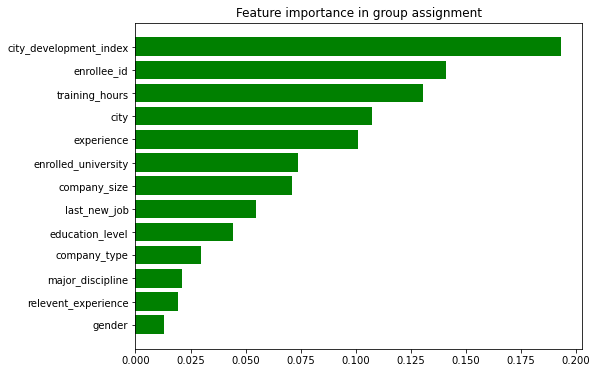

In [83]:
plt.figure(figsize=(8,6))
plt.barh(imp['Features'], imp['Importance'], color = 'g')
plt.title('Feature importance in group assignment')
plt.show()